<a href="https://colab.research.google.com/github/BiancadeFrancisco/Analise_MercadoGames/blob/main/MERCADO_GAMES_CURSO_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/PS4_GamesSales.csv', encoding = 'latin-1')

df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [ ]:
df.shape

(1034, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [ ]:
df.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2015.966061,0.204613,0.248714,0.033636,0.089014,0.576054
std,1.298360,0.563471,0.785491,0.108344,0.249410,1.583534
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.020000,0.000000,0.000000,0.010000,0.060000
75%,2017.000000,0.120000,0.130000,0.030000,0.050000,0.357500
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


In [ ]:
df.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

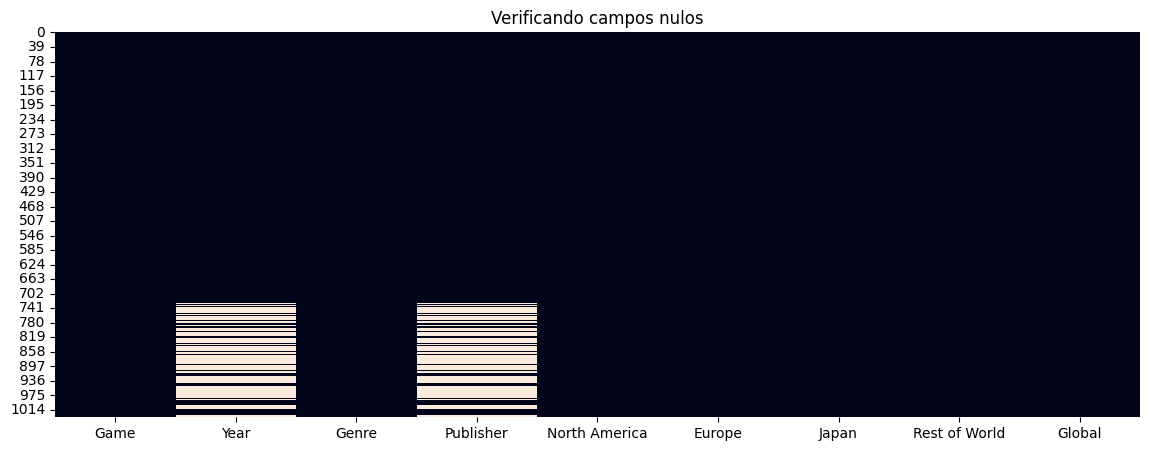

In [ ]:
# NULOS GRÁFICO:

plt.figure( figsize=(14, 5) )
plt.title('Verificando campos nulos')
sns.heatmap( df.isnull(), cbar=False );

In [ ]:
# Nesse caso não é interessante substituir os valores nulos por média ou mediana, pois cada linha é um jogo diferente. Portanto iremos excluir esses registros:

df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 1030
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           825 non-null    object 
 1   Year           825 non-null    float64
 2   Genre          825 non-null    object 
 3   Publisher      825 non-null    object 
 4   North America  825 non-null    float64
 5   Europe         825 non-null    float64
 6   Japan          825 non-null    float64
 7   Rest of World  825 non-null    float64
 8   Global         825 non-null    float64
dtypes: float64(6), object(3)
memory usage: 64.5+ KB


<ipython-input-20-7ebc05d53e6a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum)


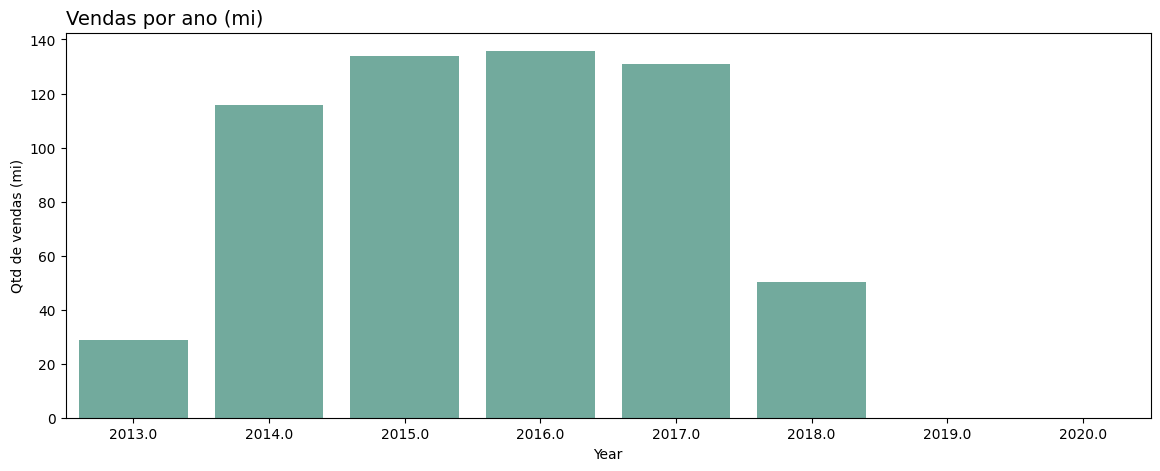

In [ ]:
# ANALISAR VENDAS DURANTE OS ANOS:

plt.figure( figsize=(14, 5) )
plt.title('Vendas por ano (mi)', loc='left', fontsize=14)
sns.barplot(data = df, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum)
plt.ylabel('Qtd de vendas (mi)');


In [ ]:
# RETIRAR ANOS 2019 E 2020:

df = df.loc[(df['Year'] != 2019) & (df['Year'] != 2020)]

In [ ]:
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


<ipython-input-31-b76f7bcdd170>:6: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(df['Global'], shade=True, bw=1, linewidth=2.5);
<ipython-input-31-b76f7bcdd170>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Global'], shade=True, bw=1, linewidth=2.5);


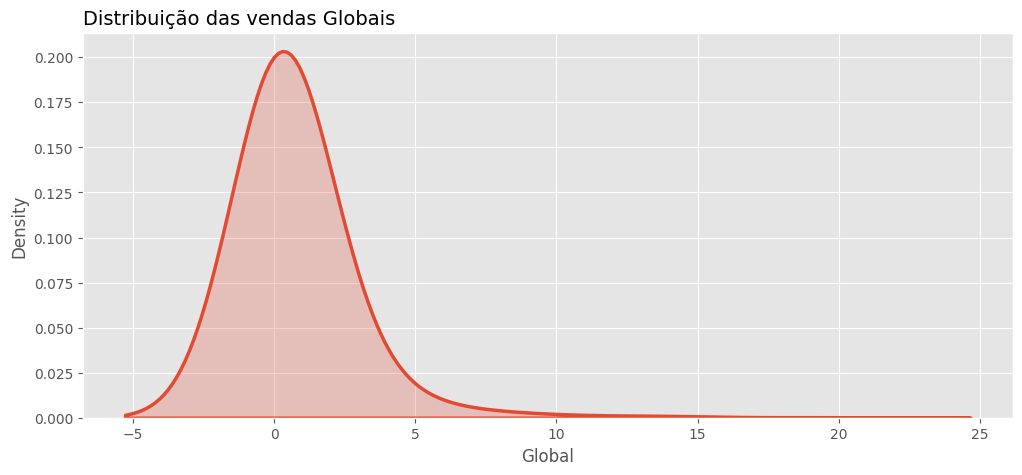

In [ ]:
# ANÁLISE VENDAS GLOBAL:

plt.figure(figsize=(12,5))
plt.style.use('ggplot')
plt.title('Distribuição das vendas Globais', loc='left', fontsize=14)
sns.kdeplot(df['Global'], shade=True, bw=1, linewidth=2.5);

In [ ]:
# DISTRIBUIÇÃO POR ANOS:

Analise = df.groupby(by=['Year']).sum().reset_index()

Analise

<ipython-input-40-91cfd0c22449>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Analise = df.groupby(by=['Year']).sum().reset_index()


,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


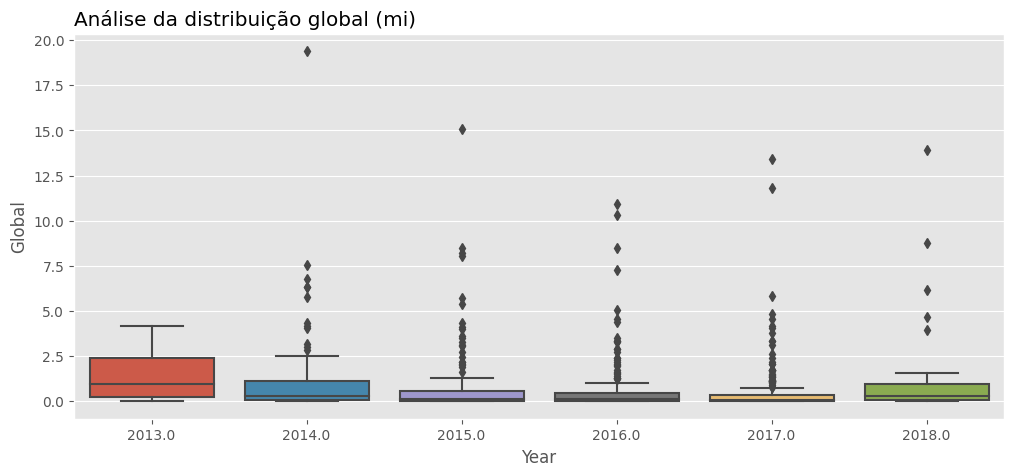

In [ ]:
# DISTRIBUIÇÃO COM BOXPLOT

plt.figure(figsize=(12,5))
plt.title('Análise da distribuição global (mi)', loc='left')
sns.boxplot(data=df, x='Year', y='Global');


In [ ]:
# TOP 10 DE VENDAS (NOSSOS OUTLIERS):

df.loc[df['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [ ]:
# ANALISANDO A PROPORÇÃO DOS 100% DE CADA CONTINENTE COMPRADADO AO TOTAL

# USAR COMO BASE: Analise = df.groupby(by=['Year']).sum().reset_index()

America = [America / Total * 100 for America, Total in zip(Analise['North America'], Analise['Global'])]
Europe = [Europe / Total * 100 for Europe, Total in zip(Analise['Europe'], Analise['Global'])]
Japao = [America / Total * 100 for America, Total in zip(Analise['Japan'], Analise['Global'])]
Mundo = [America / Total * 100 for America, Total in zip(Analise['Rest of World'], Analise['Global'])]

America, Europe, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

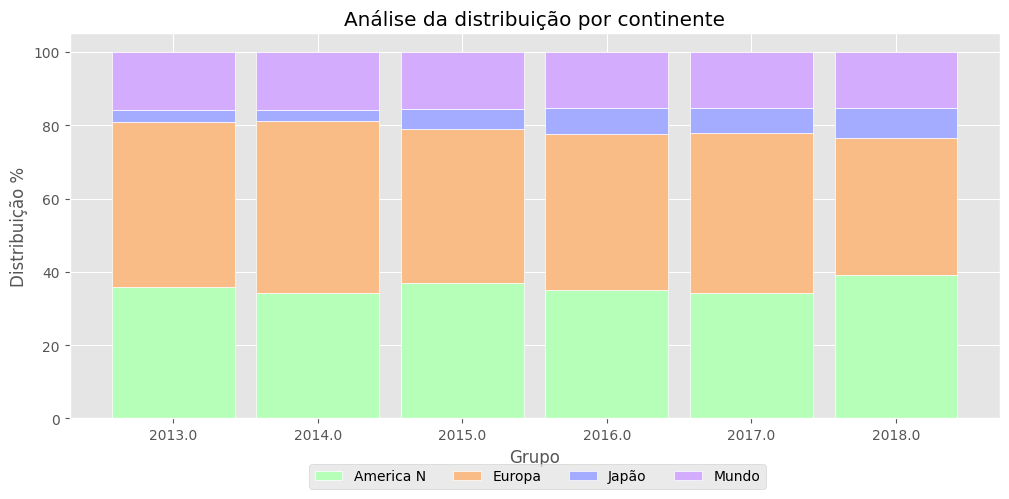

In [ ]:
# COLOCAR ESSAS ANÁLISES DOS 100% EM UM GRÁFICO DE BARRAS:

# TAMANHO:
plt.figure(figsize=(12,5))

# TITULO:
plt.title('Análise da distribuição por continente')

# BARRAS GRÁFICO:
Largura_barra = 0.85
Rotulos = Analise['Year']
Grupos=[0,1,2,3,4,5]

# PLOT CONTINENTES:
plt.bar(Grupos, America, width=Largura_barra, color='#b5ffb9', edgecolor='white')
plt.bar(Grupos, Europe, bottom=America, width=Largura_barra, color='#f9bc86', edgecolor='white')
plt.bar(Grupos, Japao, bottom=[A + B for A, B in zip(America, Europe)], width=Largura_barra, color='#a3acff', edgecolor='white')
plt.bar(Grupos, Mundo, bottom=[A + B + C for A, B, C in zip(America, Europe, Japao)], width=Largura_barra, color='#d3acfe', edgecolor='white')

# LABELS:
plt.xticks(Grupos, Rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# LEGENDA:
plt.legend(['America N', 'Europa', 'Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.25, -0.1), ncol=4);

In [ ]:
df['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [ ]:
# ATRIBUIR UM NÚMERO PARA CADA PRODUTORA DE VÍDEOS:

from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()

df['Produtor'] = Le.fit_transform(df['Publisher']) # criei uma nova coluna com o nome Produtor para receber a coluna Publisher transformada em números

df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40


In [ ]:
# ATRIBUIR NÚMEROS AS COLUNAS GENERO E JOGO, CRIANDO NOVAS COLUNAS TAMBÉM:

df['Genero'] = Le.fit_transform(df['Genre'])
df['Jogo'] = Le.fit_transform(df['Game'])

df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [ ]:
Paleta_cores = sns.color_palette('husl', 8)
Paleta_cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

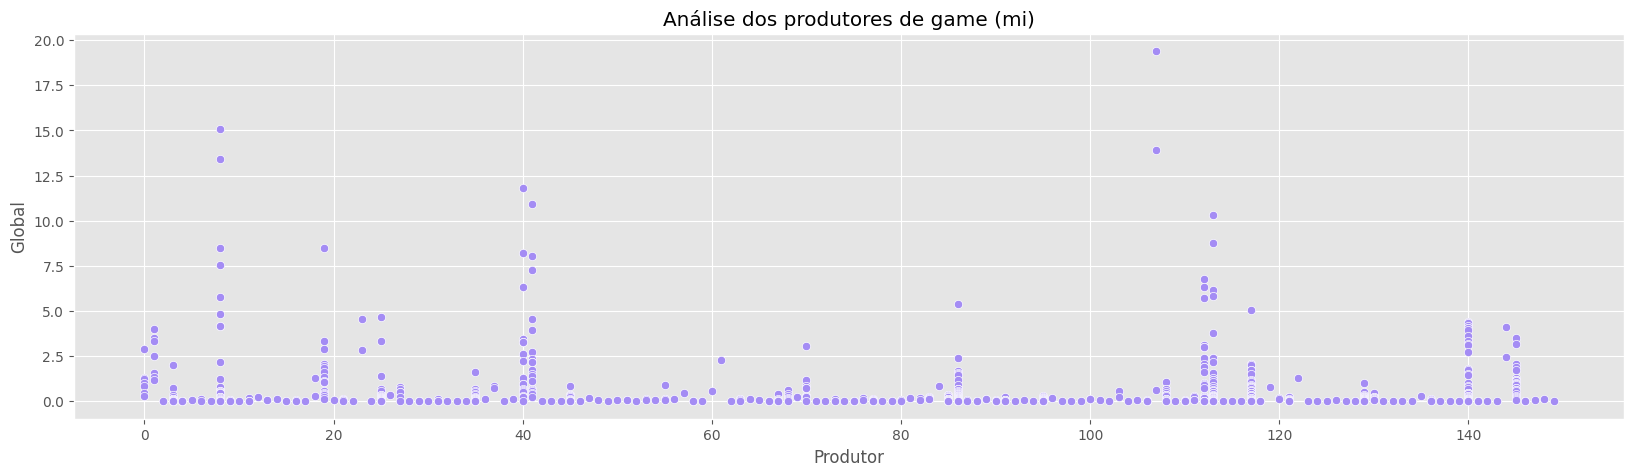

In [ ]:
# GRÁFICO ANÁLISE DAS VENDAS POR PRODUTORA:

plt.figure(figsize=(20,5))
plt.title('Análise dos produtores de game (mi)')
sns.scatterplot(data = df, x='Produtor', y='Global', color = Paleta_cores[6]);  #color = Paleta_cores[6] = indica que quero a cor número 6 da lista da paleta de cores acima

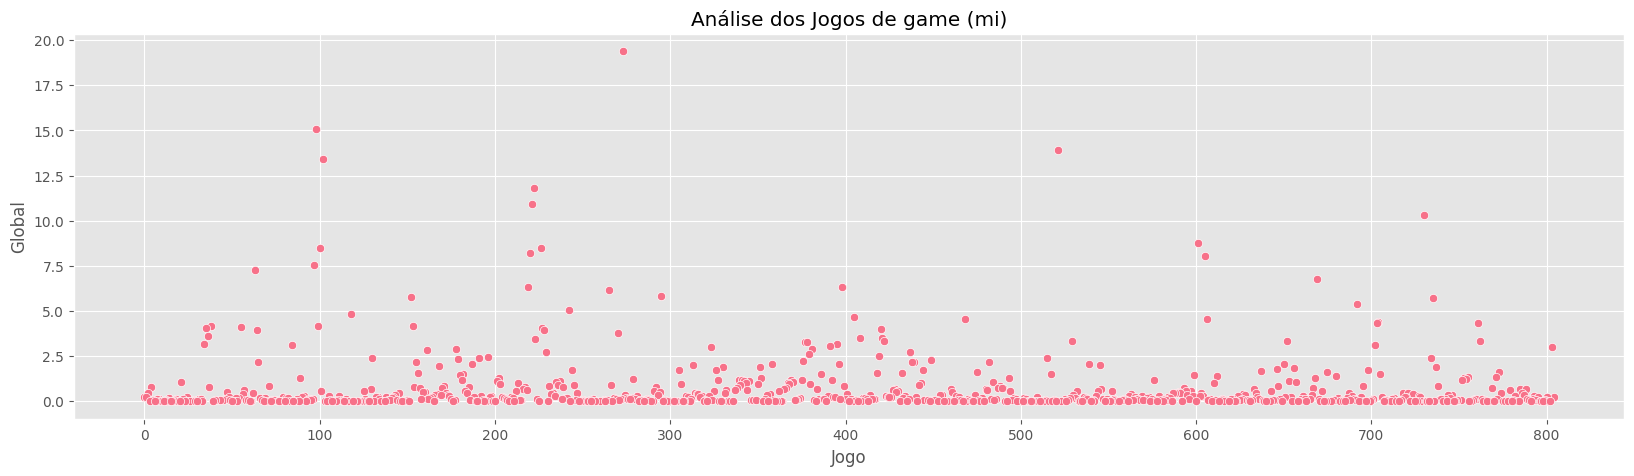

In [ ]:
# GRÁFICO ANÁLISE DAS VENDAS POR JOGOS:

plt.figure(figsize=(20,5))
plt.title('Análise dos Jogos de game (mi)')
sns.scatterplot(data = df, x='Jogo', y='Global', color = Paleta_cores[0]);

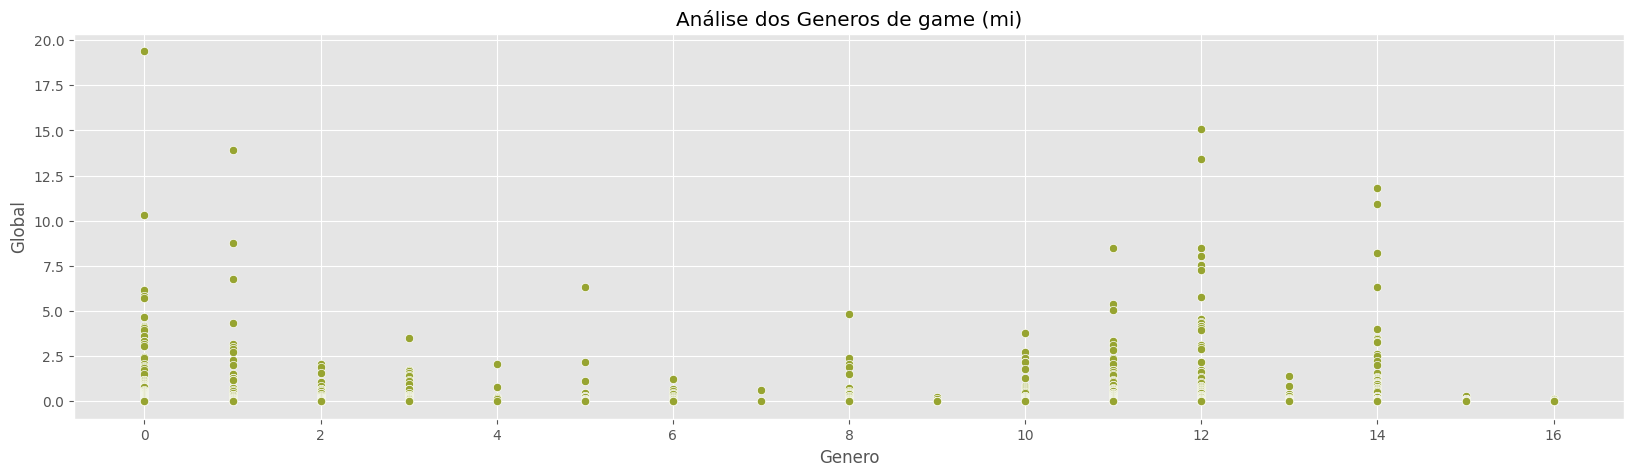

In [ ]:
# GRÁFICO ANÁLISE DAS VENDAS POR GENEROS:

plt.figure(figsize=(20,5))
plt.title('Análise dos Generos de game (mi)')
sns.scatterplot(data = df, x='Genero', y='Global', color = Paleta_cores[2]);

## FAZER RELATÓRIO GERENCIAL

<ipython-input-85-e2bc6d2d82e0>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-85-e2bc6d2d82e0>:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(Linhas, Colunas, 1)


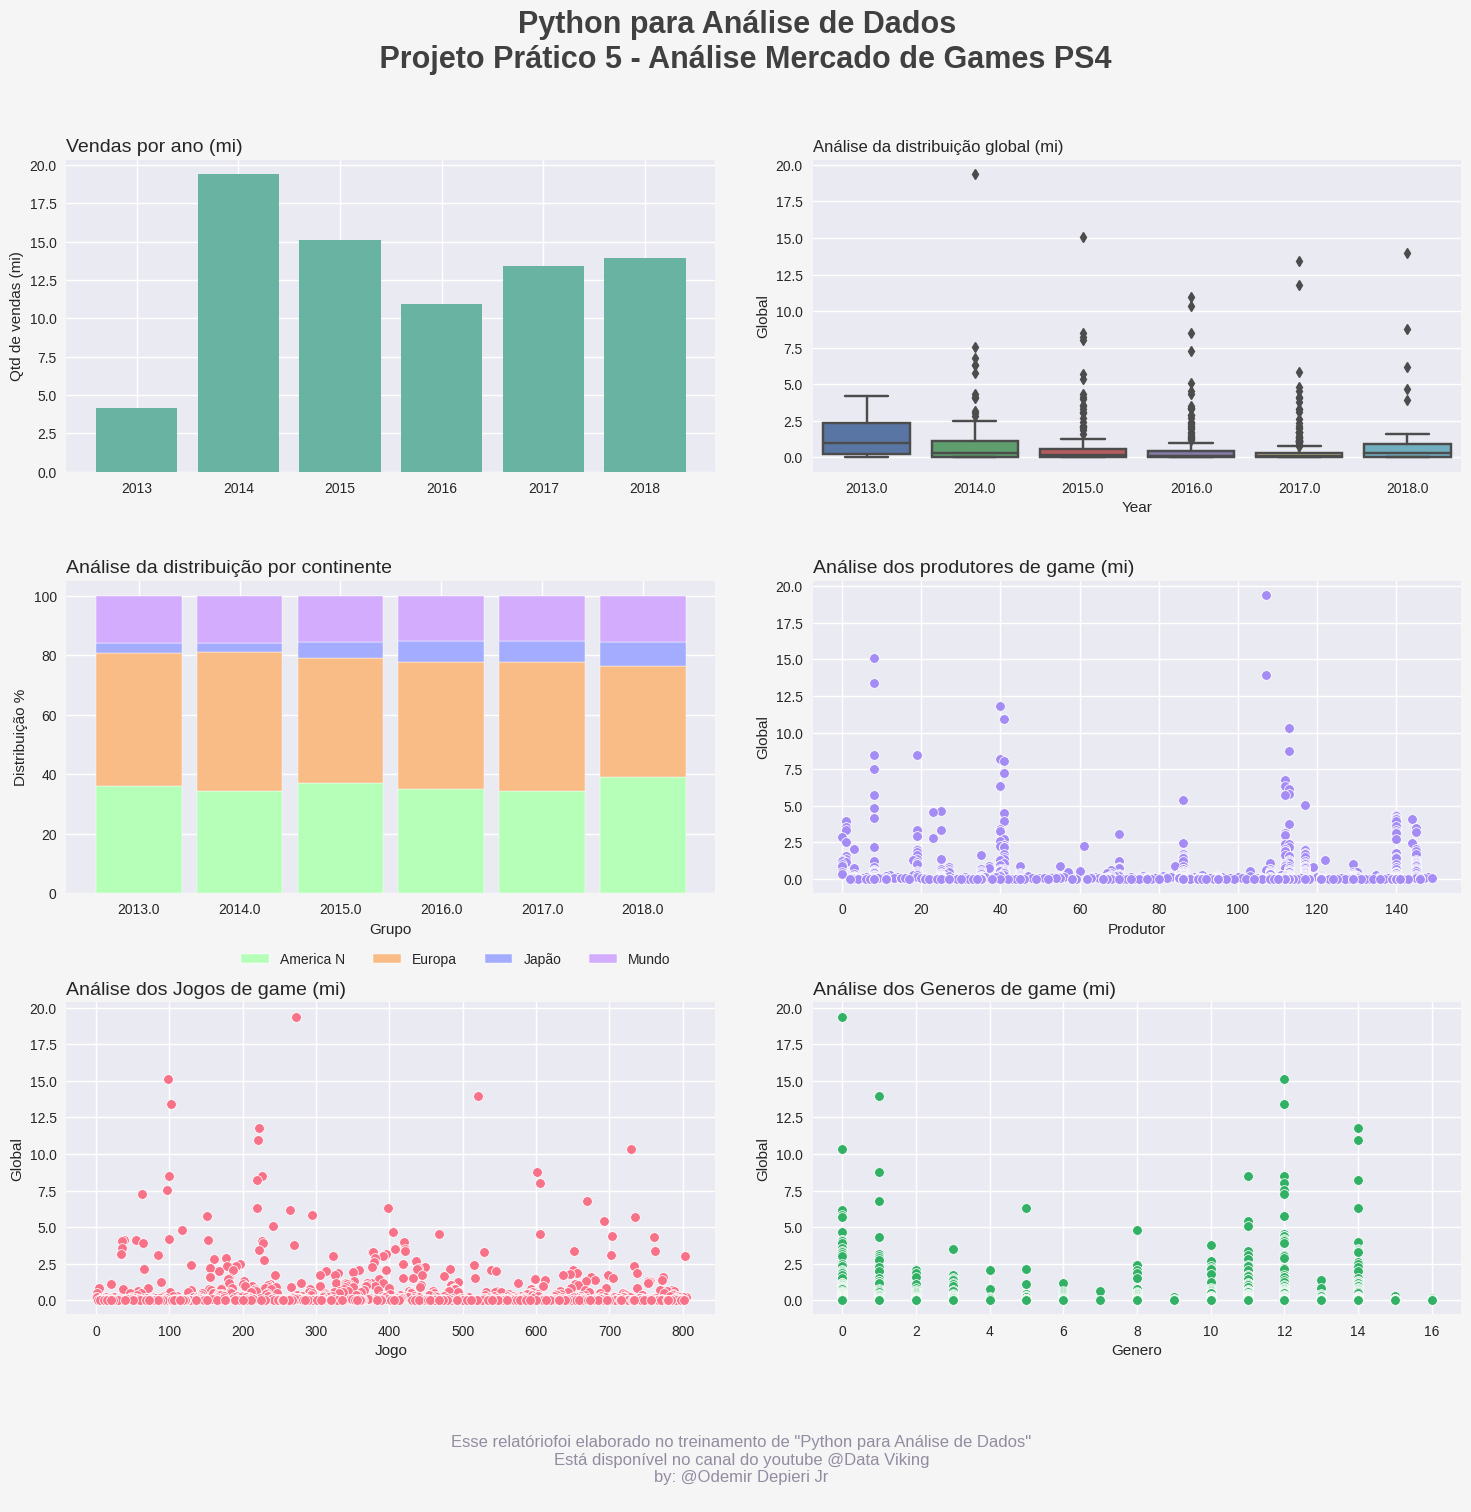

In [ ]:
# TAMANHO IMAGEM:
fig, ax = plt.subplots(figsize=(18,15))

# COR FUNDO:
Cor_Fundo = '#f5f5f5'
ax.set_facecolor(Cor_Fundo)
fig.set_facecolor(Cor_Fundo)

# ESTILO DOS GRÁFICOS:
plt.style.use('seaborn')

# TITULO IMAGEM:
plt.suptitle('Python para Análise de Dados \n Projeto Prático 5 - Análise Mercado de Games PS4', fontsize=22, color='#404040', fontweight=600)

# TITULO RODAPÉ:
Rodape = '''
Esse relatóriofoi elaborado no treinamento de "Python para Análise de Dados"
Está disponível no canal do youtube @Data Viking
by: @Odemir Depieri Jr
'''

fig.text(0.5, -0.015, Rodape, ha='center', va='bottom', size=12, color='#938ca1')

# PARÂMETROS PARA O GRID:
Linhas = 3
Colunas = 2

# ACESSANDO O GRÁFICO 1:
plt.subplot(Linhas, Colunas, 1)
plt.title('Vendas por ano (mi)', loc='left', fontsize=14)
plt.bar(df['Year'], df['Global'], color='#69b3a2')
plt.ylabel('Qtd de vendas (mi)');


# ACESSANDO O GRÁFICO 2:
plt.subplot(Linhas, Colunas, 2)
plt.title('Análise da distribuição global (mi)', loc='left')
sns.boxplot(data=df, x='Year', y='Global');


# ACESSANDO O GRÁFICO 3:
plt.subplot(Linhas, Colunas, 3)
plt.title('Análise da distribuição por continente', loc='left', fontsize=14)

Largura_barra = 0.85
Rotulos = Analise['Year']
Grupos=[0,1,2,3,4,5]

plt.bar(Grupos, America, width=Largura_barra, color='#b5ffb9', edgecolor='white')
plt.bar(Grupos, Europe, bottom=America, width=Largura_barra, color='#f9bc86', edgecolor='white')
plt.bar(Grupos, Japao, bottom=[A + B for A, B in zip(America, Europe)], width=Largura_barra, color='#a3acff', edgecolor='white')
plt.bar(Grupos, Mundo, bottom=[A + B + C for A, B, C in zip(America, Europe, Japao)], width=Largura_barra, color='#d3acfe', edgecolor='white')

plt.xticks(Grupos, Rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

plt.legend(['America N', 'Europa', 'Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.25, -0.15), ncol=4);


# ACESSANDO O GRÁFICO 4:
plt.subplot(Linhas, Colunas, 4)
plt.title('Análise dos produtores de game (mi)', loc='left', fontsize=14)
sns.scatterplot(data = df, x='Produtor', y='Global', color = Paleta_cores[6]);


# ACESSANDO O GRÁFICO 5:
plt.subplot(Linhas, Colunas, 5)
plt.title('Análise dos Jogos de game (mi)', loc='left', fontsize=14)
sns.scatterplot(data = df, x='Jogo', y='Global', color = Paleta_cores[0]);


# ACESSANDO O GRÁFICO 6:
plt.subplot(Linhas, Colunas, 6)
plt.title('Análise dos Generos de game (mi)', loc='left', fontsize=14)
sns.scatterplot(data = df, x='Genero', y='Global', color = Paleta_cores[3]);


# AJUSTAR OS SUBPLOTS:
plt.subplots_adjust(hspace=0.35, wspace=0.15)
